# Introduction aux Séries Temporelles avec Pandas

# Qu'est-ce qu'une série temporelle ?

Une serie temporelle est une suite de valeurs mesurées dans le temps, exemples :

    Ventes quotidiennes,
    Température horaire,
    Trafic réseau,
    Stock d'un entrepot.

Elle posséde : 

1. Un undex temporel (date/heure)
2. Une variable mesurée (ex : valeur, température, vente, etc.)

 # Création d'une série temporelle avec Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Création d'une série temporelle synthetique (365 jours)
dates = pd.date_range(start="2024-01-01", periods=365, freq="D")
data = np.sin(np.linspace(0, 12*np.pi, 365)) + np.random.normal(0, 0.3, 365)
df = pd.DataFrame({"Date" : dates, "Valeur" : data}).set_index("Date")
df

,Valeur
Date,
2024-01-01,-0.386979
2024-01-02,0.604763
2024-01-03,0.197729
2024-01-04,-0.003519
2024-01-05,0.957924
...,...
2024-12-26,-0.517556
2024-12-27,-0.472505
2024-12-28,0.019857


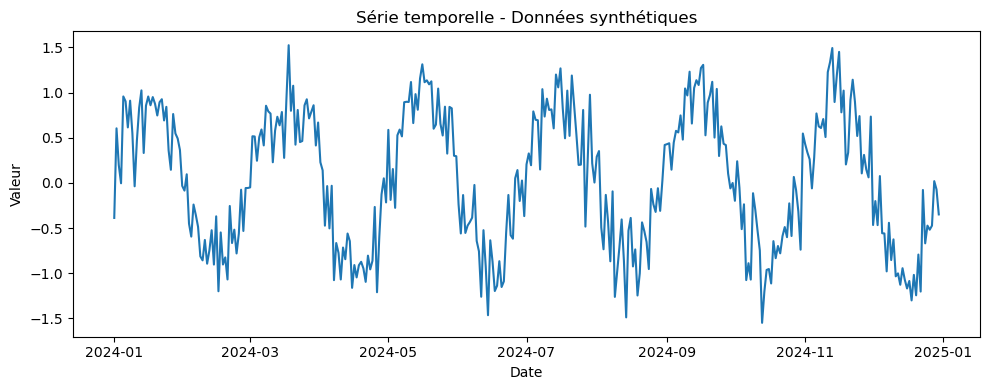

In [3]:
# evolution quotidienne 
plt.figure(figsize=(10,4))
plt.plot(df.index, df["Valeur"])
plt.title("Série temporelle - Données synthétiques")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.tight_layout()

# Sélection par date

In [4]:
df.loc["2024-03"]

,Valeur
Date,
2024-03-01,-0.048905
2024-03-02,0.517102
2024-03-03,0.514589
2024-03-04,0.245946
2024-03-05,0.506082
2024-03-06,0.592113
2024-03-07,0.415734
2024-03-08,0.854970
2024-03-09,0.792713


In [5]:
df.loc["2024-06-15":"2024-06-30"]

,Valeur
Date,
2024-06-15,-0.634794
2024-06-16,-0.871172
2024-06-17,-1.196316
2024-06-18,-1.137618
2024-06-19,-0.865945
2024-06-20,-1.151870
2024-06-21,-1.089126
2024-06-22,-0.555769
2024-06-23,-0.133070


# Extraire les années, mois, jours

In [6]:
df["month"] = df.index.month
df["year"] = df.index.year

# Résampling (changer la fréquence)

In [7]:
# Moyenne mensuelle
df_mensuel = df.resample("M").mean()
df_mensuel

C:\Users\moust\AppData\Local\Temp\ipykernel_4904\2952369144.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensuel = df.resample("M").mean()


,Valeur,month,year
Date,,,
2024-01-31,0.587740,1.0,2024.0
2024-02-29,-0.547801,2.0,2024.0
2024-03-31,0.648586,3.0,2024.0
2024-04-30,-0.631723,4.0,2024.0
2024-05-31,0.710510,5.0,2024.0
2024-06-30,-0.584696,6.0,2024.0
2024-07-31,0.618346,7.0,2024.0
2024-08-31,-0.508165,8.0,2024.0
2024-09-30,0.682169,9.0,2024.0


In [8]:
# Somme hebdomadaire
df_hebdo = df.resample("W").sum()
df_hebdo

,Valeur,month,year
Date,,,
2024-01-07,2.888066,7,14168
2024-01-14,4.086939,7,14168
2024-01-21,6.141105,7,14168
2024-01-28,4.279121,7,14168
2024-02-04,-0.207280,11,14168
2024-02-11,-4.272551,14,14168
2024-02-18,-5.193259,14,14168
2024-02-25,-4.670244,14,14168
2024-03-03,0.264623,17,14168


# Lissage

In [9]:
# lissage sur 7 jours
df["MA7"] = df["Valeur"].rolling(window=7).mean()
df

,Valeur,month,year,MA7
Date,,,,
2024-01-01,-0.386979,1,2024,NaN
2024-01-02,0.604763,1,2024,NaN
2024-01-03,0.197729,1,2024,NaN
2024-01-04,-0.003519,1,2024,NaN
2024-01-05,0.957924,1,2024,NaN
...,...,...,...,...
2024-12-26,-0.517556,12,2024,-0.710707
2024-12-27,-0.472505,12,2024,-0.600517
2024-12-28,0.019857,12,2024,-0.484443


In [10]:
# lissage sur 30 jours
df["MA30"] = df["Valeur"].rolling(window=30).mean()
df

,Valeur,month,year,MA7,MA30
Date,,,,,
2024-01-01,-0.386979,1,2024,NaN,NaN
2024-01-02,0.604763,1,2024,NaN,NaN
2024-01-03,0.197729,1,2024,NaN,NaN
2024-01-04,-0.003519,1,2024,NaN,NaN
2024-01-05,0.957924,1,2024,NaN,NaN
...,...,...,...,...,...
2024-12-26,-0.517556,12,2024,-0.710707,-0.617904
2024-12-27,-0.472505,12,2024,-0.600517,-0.644001
2024-12-28,0.019857,12,2024,-0.484443,-0.648301


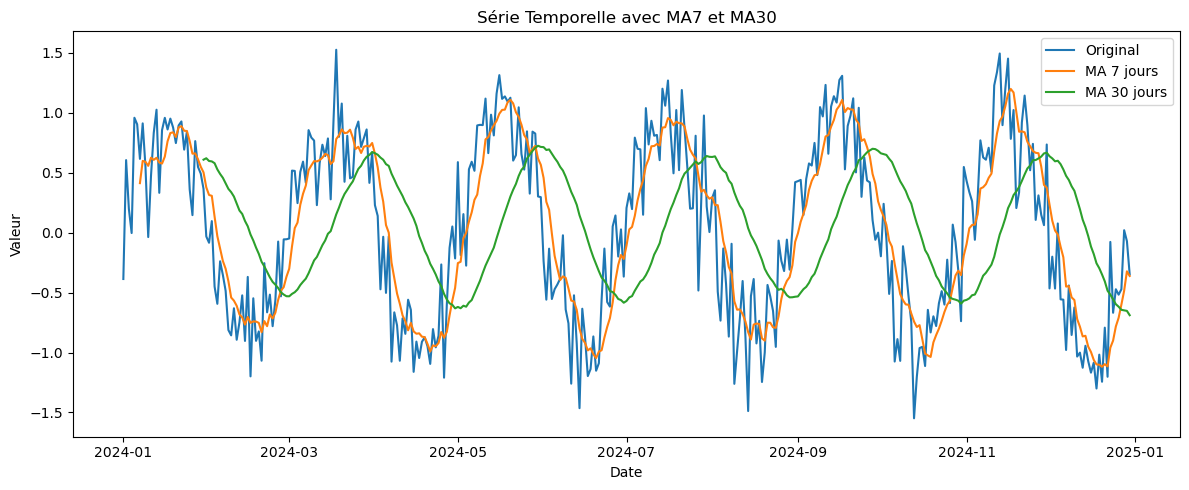

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df["Valeur"], label="Original")
plt.plot(df.index, df["MA7"], label="MA 7 jours")
plt.plot(df.index, df["MA30"], label="MA 30 jours")
plt.title("Série Temporelle avec MA7 et MA30")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.legend()
plt.tight_layout()

# Décomposition d'une série temporelle

In [12]:
df["tendance"] = df["Valeur"].rolling(60, center=True).mean()
df

,Valeur,month,year,MA7,MA30,tendance
Date,,,,,,
2024-01-01,-0.386979,1,2024,NaN,NaN,NaN
2024-01-02,0.604763,1,2024,NaN,NaN,NaN
2024-01-03,0.197729,1,2024,NaN,NaN,NaN
2024-01-04,-0.003519,1,2024,NaN,NaN,NaN
2024-01-05,0.957924,1,2024,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-12-26,-0.517556,12,2024,-0.710707,-0.617904,NaN
2024-12-27,-0.472505,12,2024,-0.600517,-0.644001,NaN
2024-12-28,0.019857,12,2024,-0.484443,-0.648301,NaN


# Détection de pics et anamalies

In [14]:
m = df["Valeur"].mean()
s = df["Valeur"].std()
anomalies = df[df["Valeur"] > m + 2*s]
anomalies

,Valeur,month,year,MA7,MA30,tendance
Date,,,,,,
2024-03-18,1.525025,3,2024,0.780292,0.151921,0.069613
